In [440]:
import pandas as pd
import numpy as np
from sklearn import preprocessing


df = pd.read_csv("combine.csv")


In [441]:
df.shape

(230072, 11)

In [442]:
df.shape

(230072, 11)

In [443]:
missing_values  = df['Donor'].count() - df['chn_aid'].count()

In [444]:
df['Donor'].value_counts()

DAC Countries, Total    16304
Japan                   13298
France                  12884
Germany                 12840
United States           11456
United Kingdom          11290
Korea                   10846
Canada                  10578
Spain                   10036
Austria                  9536
Norway                   9094
Italy                    8910
Belgium                  8864
Finland                  8334
Switzerland              8310
Sweden                   7990
Australia                7876
Greece                   7540
Netherlands              6880
Ireland                  6602
New Zealand              6192
Luxembourg               5486
Denmark                  4644
Portugal                 4344
Czech Republic           1870
United Arab Emirates     1726
Turkey                   1424
Israel                   1138
Kuwait                   1068
Poland                    888
Slovak Republic           602
Estonia                   310
Slovenia                  298
Iceland   

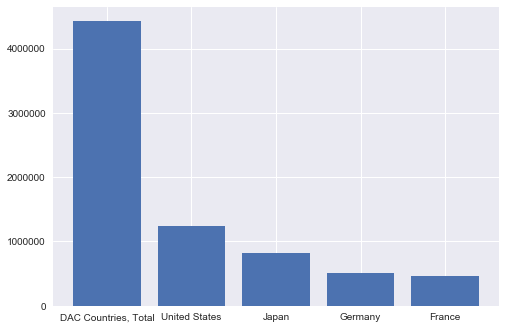

Donor
DAC Countries, Total    4427751.70
United States           1238943.75
Japan                    823538.00
Germany                  505973.05
France                   457272.44
United Kingdom           255781.58
Australia                138588.31
Canada                   119032.61
Netherlands              116910.73
Spain                    105517.53
Name: Value, dtype: float64

In [445]:
#This chunk of code explains the biggest contributor and the graph depicts the same information visually.

biggest_donors = df.groupby(['Donor']).sum()['Value'].sort_values(ascending = False)
biggest_donors_index = df.groupby(['Donor']).mean()['Value'].sort_values(ascending = False).index[:5]
biggest_donors_top_5  = biggest_donors.iloc[:5]
biggest_donors_top_5  = list(biggest_donors_top_5)
plt.bar(biggest_donors_index, biggest_donors_top_5)
plt.show()
biggest_donors[:10]


In [446]:
biggest_recipients = df.groupby(['Recipient']).sum()['Value'].sort_values(ascending = False)


In [447]:
df[df['Donor'] == 'Germany'].corr()

,Year,Value,gdp,pop,openness,chn_aid,unsc
Year,1.000000,0.105285,0.275990,0.022315,0.051014,0.163516,0.021142
Value,0.105285,1.000000,-0.047821,0.412737,-0.118941,0.022642,0.060304
gdp,0.275990,-0.047821,1.000000,-0.047686,0.186558,0.001817,0.084854
pop,0.022315,0.412737,-0.047686,1.000000,-0.196182,0.020648,0.089304
openness,0.051014,-0.118941,0.186558,-0.196182,1.000000,-0.048411,-0.087607
chn_aid,0.163516,0.022642,0.001817,0.020648,-0.048411,1.000000,-0.022321
unsc,0.021142,0.060304,0.084854,0.089304,-0.087607,-0.022321,1.000000


In [448]:
#Removing Missing values and then checking these observations again 
total_missing_values = df.isna().sum()
df.dropna(inplace  = True)

In [449]:
df.shape

(107064, 11)

In [450]:
biggest_donors = df.groupby(['Donor']).sum()['Value'].sort_values(ascending = False)
biggest_donors

biggest_recipients = df.groupby(['Recipient']).sum()['Value'].sort_values(ascending = False)
biggest_recipients

df[df['Donor'] == 'United Kingdom'].corr()

# There is no such difference in the correlation after droping the missing values.



,Year,Value,gdp,pop,openness,chn_aid,unsc
Year,1.000000,-0.025326,0.304603,0.012463,0.051109,0.158836,-0.018202
Value,-0.025326,1.000000,-0.114222,0.189827,-0.147254,0.045580,0.012518
gdp,0.304603,-0.114222,1.000000,-0.071682,0.256829,-0.007961,0.095778
pop,0.012463,0.189827,-0.071682,1.000000,-0.218335,0.011002,0.064560
openness,0.051109,-0.147254,0.256829,-0.218335,1.000000,-0.059703,-0.079819
chn_aid,0.158836,0.045580,-0.007961,0.011002,-0.059703,1.000000,-0.031855
unsc,-0.018202,0.012518,0.095778,0.064560,-0.079819,-0.031855,1.000000


In [451]:
#Replacing missing values with mean
df = pd.read_csv("combine.csv")
df['chn_aid'] = df['chn_aid'].fillna(df['chn_aid'].mean())
df['gdp'] = df['gdp'].fillna(df['gdp'].mean())
df['pop'] = df['pop'].fillna(df['pop'].mean())
df['openness'] = df['openness'].fillna(df['openness'].mean())

df[df['Donor'] == 'United Kingdom'].corr()

#There is no such difference in the correlation between ODA top countries values and china aid after replacing the
#missing values with mean.


,Year,Value,gdp,pop,openness,chn_aid,unsc
Year,1.000000,-0.005280,0.242653,-0.002492,0.039283,0.104889,0.020275
Value,-0.005280,1.000000,-0.132745,0.188549,-0.131229,0.042884,0.012290
gdp,0.242653,-0.132745,1.000000,-0.060270,0.165550,0.001826,0.098464
pop,-0.002492,0.188549,-0.060270,1.000000,-0.202760,0.004982,0.092751
openness,0.039283,-0.131229,0.165550,-0.202760,1.000000,-0.043651,-0.093562
chn_aid,0.104889,0.042884,0.001826,0.004982,-0.043651,1.000000,-0.019965
unsc,0.020275,0.012290,0.098464,0.092751,-0.093562,-0.019965,1.000000


(21754, 11)


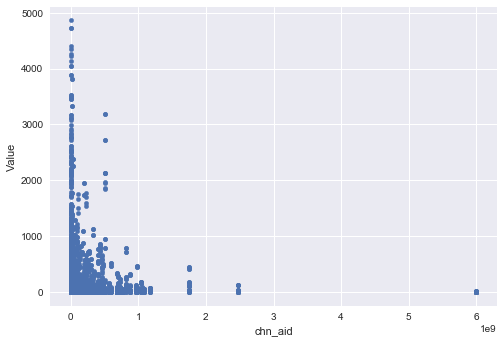

,Year,Value,gdp,pop,openness,chn_aid,unsc
Year,1.000000,0.036072,0.290381,0.016116,0.059138,0.159398,-0.025944
Value,0.036072,1.000000,-0.079567,0.208928,-0.074695,0.009336,0.028191
gdp,0.290381,-0.079567,1.000000,-0.077180,0.267206,-0.008738,0.064659
pop,0.016116,0.208928,-0.077180,1.000000,-0.210603,0.015226,0.066544
openness,0.059138,-0.074695,0.267206,-0.210603,1.000000,-0.051627,-0.073510
chn_aid,0.159398,0.009336,-0.008738,0.015226,-0.051627,1.000000,-0.026191
unsc,-0.025944,0.028191,0.064659,0.066544,-0.073510,-0.026191,1.000000


In [452]:
#This indicates that there may be Omitted varaince bais in the dataset because we have not yet considered the control variables
# Therefore we now apply the regression analysis by adding the control variables as well.
df = pd.read_csv("combine.csv")
df.dropna(inplace  = True)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

top_countries  = df[(df['Donor'] == 'United States') | (df['Donor'] == 'United Kingdom') | (df['Donor'] == 'Germany') | (df['Donor'] == 'Japan') ]

print(top_countries.shape)
top_countries.plot(x='chn_aid', y='Value', kind='scatter')
plt.show()
top_countries.corr()


In [453]:
import statsmodels.api as sm

reg1 = sm.OLS(endog=top_countries['Value'], exog=top_countries[['chn_aid', 'pop', 'gdp', 'openness']], missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [454]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

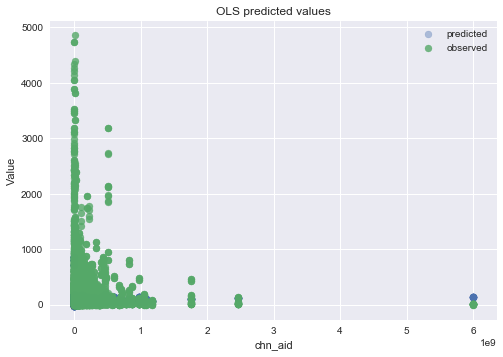

In [455]:
fix, ax = plt.subplots()
ax.scatter(top_countries['chn_aid'], results.predict(), alpha=0.4, label='predicted')

# Plot observed values

ax.scatter(top_countries['chn_aid'], top_countries['Value'], alpha=0.8, label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('chn_aid')
ax.set_ylabel('Value')
plt.show()

#This does not caters the time series lags therefore the predicted values remain same throughout. 


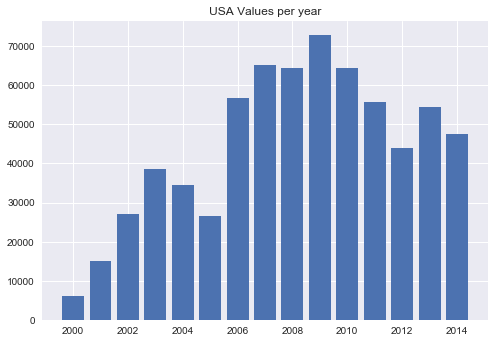

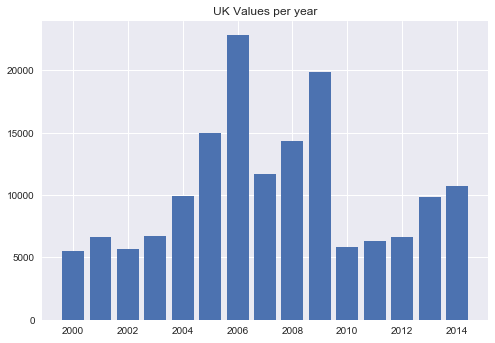

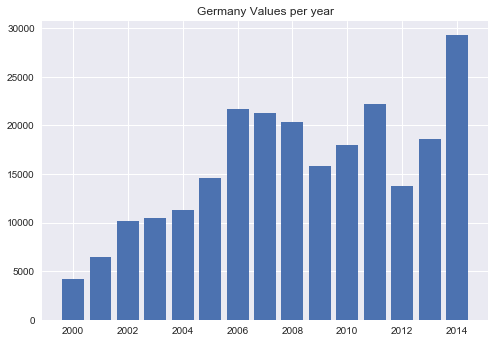

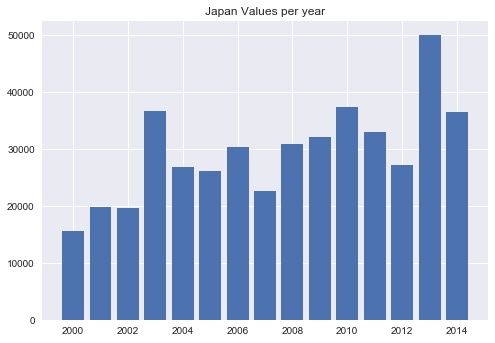

Text(0.5, 1.0, 'China Aid per year')

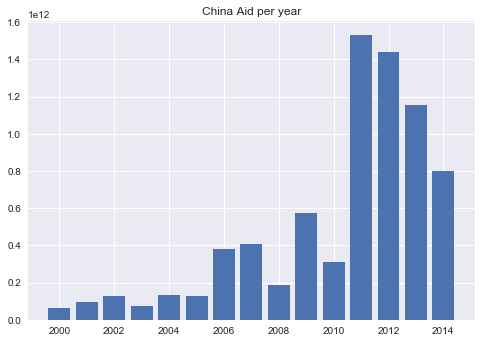

In [456]:
#This chunk of code visually explains how the OED countries - UK, US, Germany and Japan have contributed over the year
# vs how the china has contributed.

top_countries_usa = top_countries[top_countries.iloc[:, 1] == 'United States']
top_countries_usa  = top_countries_usa[['Year', 'Value']]

x = list(top_countries_usa.groupby(['Year']).sum().index)
y = top_countries_usa.groupby(['Year']).sum().values.tolist()

flat_list = []
for sublist in y:
    for item in sublist:
        flat_list.append(item)
        
plt.bar(x,flat_list)
plt.title('USA Values per year')
plt.show()



top_countries_usa = top_countries[top_countries.iloc[:, 1] == 'United Kingdom']
top_countries_usa  = top_countries_usa[['Year', 'Value']]

x = list(top_countries_usa.groupby(['Year']).sum().index)
y = top_countries_usa.groupby(['Year']).sum().values.tolist()

flat_list = []
for sublist in y:
    for item in sublist:
        flat_list.append(item)
        
plt.bar(x,flat_list)
plt.title('UK Values per year')
plt.show()


top_countries_usa = top_countries[top_countries.iloc[:, 1] == 'Germany']
top_countries_usa  = top_countries_usa[['Year', 'Value']]

x = list(top_countries_usa.groupby(['Year']).sum().index)
y = top_countries_usa.groupby(['Year']).sum().values.tolist()

flat_list = []
for sublist in y:
    for item in sublist:
        flat_list.append(item)
        
plt.bar(x,flat_list)
plt.title('Germany Values per year')
plt.show()


top_countries_usa = top_countries[top_countries.iloc[:, 1] == 'Japan']
top_countries_usa  = top_countries_usa[['Year', 'Value']]

x = list(top_countries_usa.groupby(['Year']).sum().index)
y = top_countries_usa.groupby(['Year']).sum().values.tolist()

flat_list = []
for sublist in y:
    for item in sublist:
        flat_list.append(item)
        
plt.bar(x,flat_list)
plt.title('Japan Values per year')
plt.show()


df_china  = df[['Year', 'chn_aid']]

x = list(df_china.groupby(['Year']).sum().index)
y = df_china.groupby(['Year']).sum().values.tolist()

flat_list = []
for sublist in y:
    for item in sublist:
        flat_list.append(item)
        
plt.bar(x,flat_list)
plt.title('China Aid per year')
#plt.show()

In [457]:
#This chunk of code explains that there isn't much correlation between the china aid and other countries but
#The control variable opennness has pretty good effect as we can see that the intercept of openness is 0.4565 and it is 
#negatively correlated with the dependent variable.


import numpy as np
from statsmodels.datasets import grunfeld
data = grunfeld.load_pandas().data
data.year = data.year.astype(np.int64)
# MultiIndex, entity - time
#data = data.set_index(['firm','year'])
top_countries = top_countries.set_index(['Donor', 'Year'])
from linearmodels import PanelOLS
openness = np.log(df['openness'])
mod = PanelOLS(top_countries.Value, top_countries[['chn_aid', 'openness']], entity_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)

In [458]:
#Panel OLS including the within - fixed effect -  and between - Averaging over the multiple years - analysis.

import statsmodels.formula.api as smf
#dat = sm.datasets.get_rdataset("Guerry", "HistData").data
results = smf.ols('Value ~ chn_aid + np.log(openness)', data=top_countries).fit()

In [459]:
#This is another way to analyze the correlation via the regression analysis using PARTIAL CORRELATIONS which is 
#checking the correlation betweeen the china aid and oed countries keeping the effect of other control variables constant
#such as population, gdp and openness.

import numpy as np
from scipy import stats, linalg

data  = top_countries[['Value','gdp', 'pop', 'openness', 'chn_aid','unsc']]
C = np.asarray(data)
p = C.shape[1]
P_corr = np.zeros((p, p), dtype=np.float)
for i in range(p):
    P_corr[i, i] = 1
    for j in range(i+1, p):
        idx = np.ones(p, dtype=np.bool)
        idx[i] = False
        idx[j] = False
        beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
        beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

        res_j = C[:, j] - C[:, idx].dot( beta_i)
        res_i = C[:, i] - C[:, idx].dot(beta_j)

        corr = stats.pearsonr(res_i, res_j)[0]
        P_corr[i, j] = corr
        P_corr[j, i] = corr
        

P_corr  =  pd.DataFrame(P_corr, columns = ['Value', 'gdp', 'pop','openness', 'chn_aid', 'unsc'], index = ['Value', 'gdp', 'pop','openness', 'chn_aid', 'unsc'])
P_corr


,Value,gdp,pop,openness,chn_aid,unsc
Value,1.000000,-0.050219,0.236038,0.086489,0.020238,0.031888
gdp,-0.050219,1.000000,0.011571,0.403161,0.021022,0.102739
pop,0.236038,0.011571,1.000000,-0.007433,0.041865,0.086112
openness,0.086489,0.403161,-0.007433,1.000000,0.051251,-0.003239
chn_aid,0.020238,0.021022,0.041865,0.051251,1.000000,-0.015841
unsc,0.031888,0.102739,0.086112,-0.003239,-0.015841,1.000000
